In [64]:
## Carga del csv y paquetes necesarios

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("../data/raw/datos_crudos.xlsx", header = 1)

df = df[['Serial', 'Event', '&quot;Provincia&quot;', '&quot;CantÃ³n&quot;','&quot;Distrito&quot;', '&quot;Location&quot;', 'Date (YMD)','Comments', 'Cause', 'Description of Cause', 'Source', 'Magnitude', 'Duration (d)', 'Other sectors', 'Deaths', 'Injured', 'Missing', 'Houses Destroyed', 'Houses Damaged', 'Directly affected', 'Indirectly Affected', 'Relocated', 'Evacuated', 'Losses $Local', 'Education centers', 'Hospitals']]

df.columns = ['Serial', 'Event', 'Provincia', 'Canton','Distrito', 'Ubicacion', 'Date (YMD)','Comments', 'Cause', 'Description of Cause', 'Source', 'Magnitude', 'Duration (d)', 'Other sectors', 'Deaths', 'Injured', 'Missing', 'Houses Destroyed', 'Houses Damaged', 'Directly affected', 'Indirectly Affected', 'Relocated', 'Evacuated', 'Losses $Local', 'Education centers', 'Hospitals']

df = df.dropna(subset = ['Event', 'Losses $Local'])

In [65]:
df.isnull().sum()

Serial                      0
Event                       0
Provincia                   0
Canton                     68
Distrito                  887
Ubicacion                3261
Date (YMD)                  0
Comments                 4228
Cause                       1
Description of Cause     7499
Source                      6
Magnitude               18164
Duration (d)               34
Other sectors           16722
Deaths                      9
Injured                     3
Missing                     1
Houses Destroyed            2
Houses Damaged              2
Directly affected           0
Indirectly Affected         0
Relocated                   0
Evacuated                   0
Losses $Local               0
Education centers           0
Hospitals                   0
dtype: int64

### Análisis de Eventos y sus causas

In [66]:
# Análisis de eventos por tipo

conteo = pd.DataFrame(df["Event"].value_counts().reset_index())

<Axes: xlabel='count', ylabel='Event'>

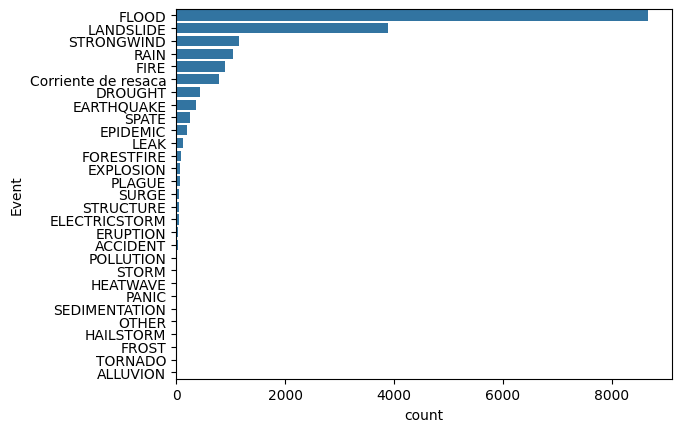

In [67]:
sns.barplot(data=conteo, x="count", y="Event")

In [68]:
conteo["frec_rel"] = conteo["count"] / conteo["count"].sum() * 100

# Con esto vemos como hay algunas categorías que tienen una frecuencia relativa demasiado baja y se podrían eliminar del estudio

In [69]:
df["Losses $Local"].unique()
df = df[df["Losses $Local"] != "AfectaciÃ³n por exceso de escorrentÃ\xada superficial."]
df["Losses $Local"] = df["Losses $Local"].astype(float)
conteo["promedio_danos"] = df.groupby("Event")["Losses $Local"].mean().reset_index(drop=True)

In [70]:
conteo

,Event,count,frec_rel,promedio_danos
0,FLOOD,8667,47.164780,0.000000e+00
1,LANDSLIDE,3886,21.147148,0.000000e+00
2,STRONGWIND,1163,6.328907,0.000000e+00
3,RAIN,1042,5.670440,8.198361e+06
4,FIRE,903,4.914018,7.534745e+07
5,Corriente de resaca,787,4.282760,2.234043e+05
6,DROUGHT,439,2.388986,1.835821e+04
7,EARTHQUAKE,373,2.029822,2.222222e+05
8,SPATE,250,1.360470,3.421053e+04
9,EPIDEMIC,201,1.093818,3.359313e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'FLOOD'),
  Text(1, 0, 'LANDSLIDE'),
  Text(2, 0, 'STRONGWIND'),
  Text(3, 0, 'RAIN'),
  Text(4, 0, 'FIRE'),
  Text(5, 0, 'Corriente de resaca'),
  Text(6, 0, 'DROUGHT'),
  Text(7, 0, 'EARTHQUAKE'),
  Text(8, 0, 'SPATE'),
  Text(9, 0, 'EPIDEMIC'),
  Text(10, 0, 'LEAK'),
  Text(11, 0, 'FORESTFIRE'),
  Text(12, 0, 'EXPLOSION'),
  Text(13, 0, 'PLAGUE'),
  Text(14, 0, 'SURGE'),
  Text(15, 0, 'STRUCTURE'),
  Text(16, 0, 'ELECTRICSTORM'),
  Text(17, 0, 'ERUPTION'),
  Text(18, 0, 'ACCIDENT'),
  Text(19, 0, 'POLLUTION'),
  Text(20, 0, 'STORM'),
  Text(21, 0, 'HEATWAVE'),
  Text(22, 0, 'PANIC'),
  Text(23, 0, 'SEDIMENTATION'),
  Text(24, 0, 'OTHER'),
  Text(25, 0, 'HAILSTORM'),
  Text(26, 0, 'FROST'),
  Text(27, 0, 'TORNADO'),
  Text(28, 0, 'ALLUVION')])

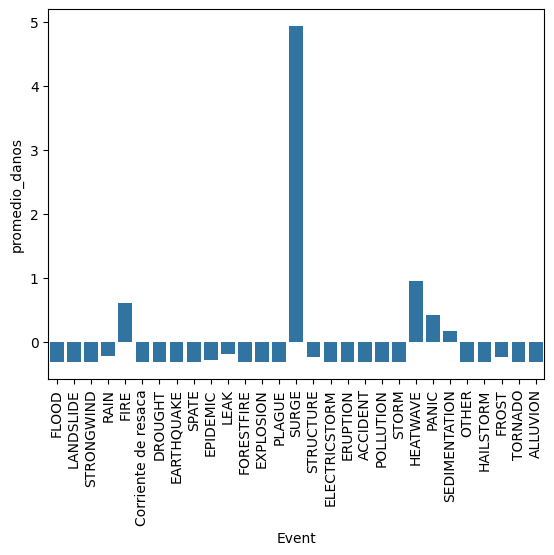

In [76]:
prueba = conteo
prueba['promedio_danos'] = (prueba['promedio_danos']-prueba['promedio_danos'].mean())/(prueba['promedio_danos'].std())
sns.barplot(data = conteo, x = 'Event', y = 'promedio_danos')
plt.xticks(rotation=90)